<a href="https://colab.research.google.com/github/EnFiore/ai-machine-learning-modelli-e-algoritmi/blob/main/7%20-%20Decision%20Tree%20e%20Random%20Forest/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

### Importiamo i moduli

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

#dataset
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes

### Definiamo le costanti

In [5]:
RANDOM_SEED = 0

#Regressione


In [15]:
X,y = load_diabetes(return_X_y=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

In [18]:
dtr = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=3,
    min_samples_split=4, #numero minimo di campioni per eseguire lo split
    max_features=3, #selezione causale delle feature. None usa tutte le feature, se si mette il valore occorre impostare il RANDOMSTE
    random_state=RANDOM_SEED
)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=3, min_samples_leaf=3,
                      min_samples_split=4, random_state=0)

In [19]:
dtr.predict(X_test)

array([243.75      , 172.44444444, 172.44444444,  98.93939394,
       272.33333333, 134.5       , 106.73584906, 172.44444444,
        78.22222222, 208.06896552, 142.77419355, 172.44444444,
       179.66666667,  55.26666667, 200.66666667, 109.85714286,
       179.66666667,  78.22222222,  70.75      , 286.5       ,
       239.        , 106.73584906,  98.93939394,  55.26666667,
       208.06896552, 172.44444444, 123.4       ,  73.        ,
       239.        , 172.44444444, 213.        ,  78.22222222,
        70.75      ,  98.93939394,  98.93939394, 243.75      ,
       142.77419355, 142.77419355,  78.22222222, 200.66666667,
        98.93939394, 200.66666667,  98.93939394, 179.66666667,
       172.44444444,  55.26666667, 106.73584906,  78.22222222,
       200.66666667, 263.5       , 142.77419355,  78.22222222,
        78.22222222, 243.75      , 263.5       , 263.2       ,
       172.44444444,  98.33333333, 200.66666667, 172.44444444,
       208.06896552, 106.73584906, 208.06896552,  98.93

#CLASSIFICAZIONE

### Carichiamo il dataset

In [20]:
iris = load_iris()
X = iris.data
y = iris.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

### Addestriamo l'albero

In [23]:
tree = DecisionTreeClassifier(
    criterion='gini', # oppure entropy
    min_samples_leaf=3,
    min_samples_split=4, #numero minimo di campioni per eseguire lo split
    max_features=3, #selezione causale delle feature. None usa tutte le feature, se si mette il valore occorre impostare il RANDOMSTE
    random_state=RANDOM_SEED
)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

In [28]:
tree.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [29]:
#probabilità associate alle variabili target
tree.predict_proba(X_test)

array([[0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

### Visualizziamo l'albero

#### Metodo 1: Testuale

In [24]:
from sklearn.tree import export_text

print(export_text(tree, feature_names=iris.feature_names))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- sepal length (cm) <= 5.95
|   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  5.95
|   |   |   |--- class: 2



#### Metodo 2: Grafico

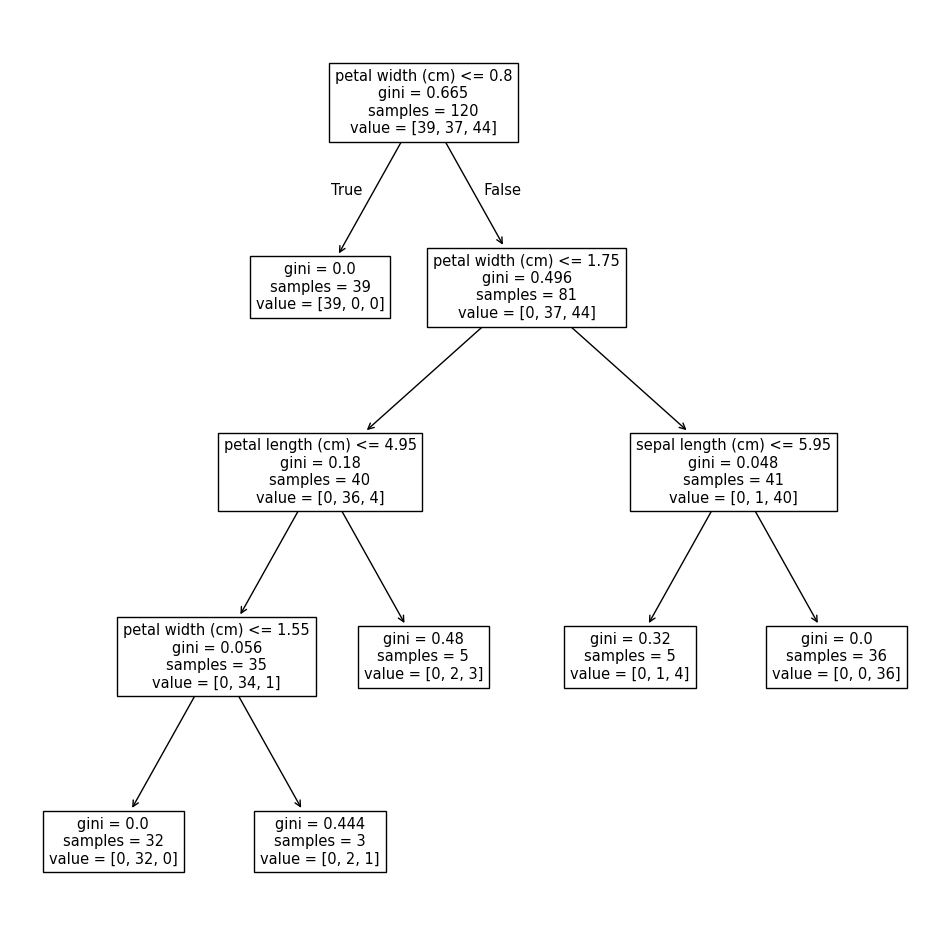

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,12))
plot_tree(tree, feature_names=iris.feature_names)
plt.show()

#### Metodo 3: GraphViz

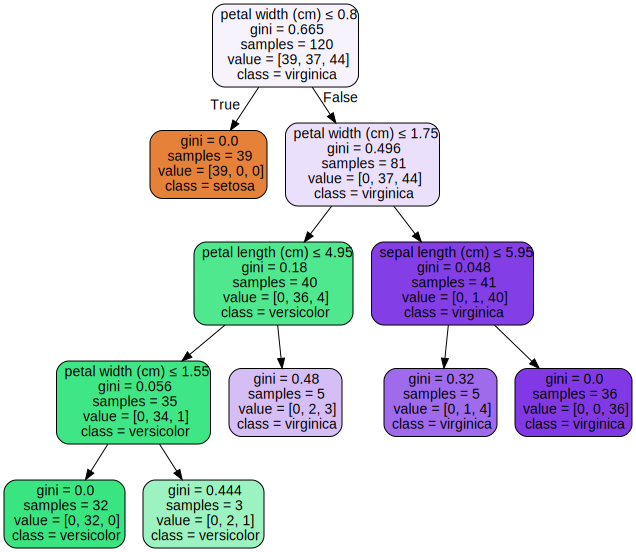

In [26]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None,
                      feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render("iris")
graph

In [27]:
from IPython.display import Image, display

def tree_viz(tree, feature_names, class_names):
  dot_data = export_graphviz(tree, out_file=None,
                        feature_names=feature_names,
                        class_names=class_names,
                        filled=True, rounded=True,
                        special_characters=True)
  graph = graphviz.Source(dot_data, filename="tree", format="png")
  graph.view()
  display(Image("tree.png"))

### Pruning

#### Pre-Pruning
- Limitare la profondità = max_depth
- Definire un numero minimo di esempi per foglia = min_samples_leaf
- Definire un numero minimo di esempi per ogni split = min_samples_split
- Definire una massima impurità accettata = min_impurity_decrease


In [ ]:
tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

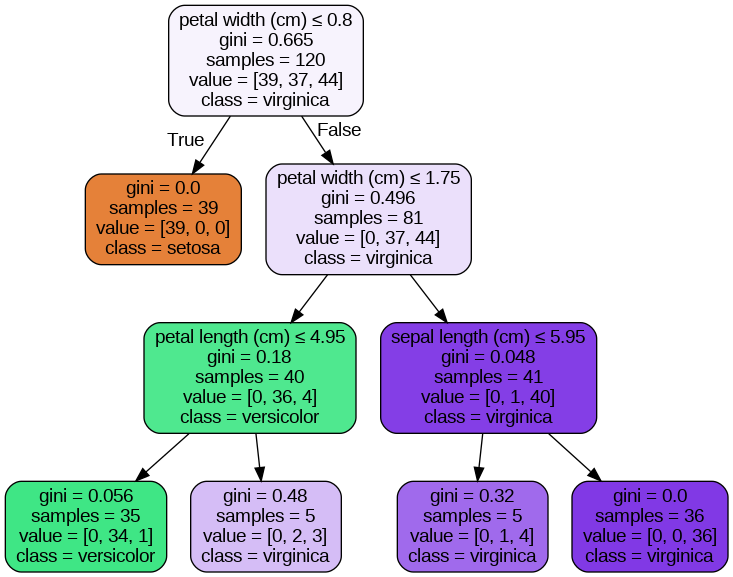

In [ ]:
tree_viz(tree, iris.feature_names, iris.target_names)

### Post-Pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(ccp_alpha=.1)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9666666666666667

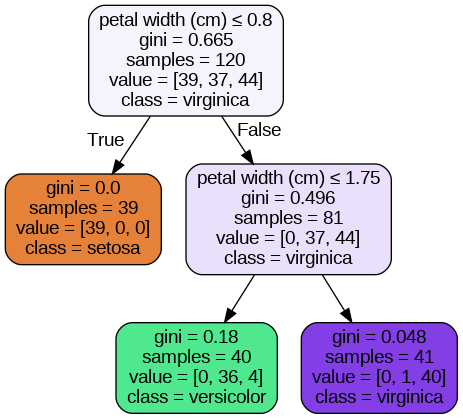

In [ ]:
tree_viz(tree, iris.feature_names, iris.target_names)